# EDA into Medical Charges of US Population 

## 1. Importing Python Libraries and Dataset

In [2]:
import pandas as pd 
import math as math
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ttest_ind
import numpy as np
import scipy.stats as stats

In [3]:
# 1. Import insurance dataset 
data_csv = pd.read_csv('/Users/jkurniawan/Documents/Pacmann/Probability/Dataset/insurance.csv')

## 2. Exploring Data 

In [212]:
# 2. Read data 

data_csv

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [213]:
# 2.1 Look at information of data columns

data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [97]:
# 2.2 Statistical Summary of Data

data_csv.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [103]:
# 2.3 Examining each unique values in categorical variable 

smoker_values = data_csv ['smoker'].unique()
region_values = data_csv ['region'].unique()
sex_values = data_csv ['sex'].unique()
children_values = data_csv ['children'].unique()

print(f"smoker: {smoker_values} region: {region_values} sex: {sex_values} children: {children_values}")

smoker: ['yes' 'no'] region: ['southwest' 'southeast' 'northwest' 'northeast'] sex: ['female' 'male'] children: [0 1 3 2 5 4]


In [104]:
# 2.3 Counting proportion in categorical variable

data_csv.groupby('sex').count()

,age,bmi,children,smoker,region,charges,bmi-range
sex,,,,,,,
female,662,662,662,662,662,662,660
male,676,676,676,676,676,676,676


In [19]:
data_csv.groupby('region').count()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


In [20]:
data_csv.groupby('smoker').count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


In [102]:
data_csv.groupby('children').count()

,age,sex,bmi,smoker,region,charges,bmi-range
children,,,,,,,
0,574,574,574,574,574,574,573
1,324,324,324,324,324,324,323
2,240,240,240,240,240,240,240
3,157,157,157,157,157,157,157
4,25,25,25,25,25,25,25
5,18,18,18,18,18,18,18


## 3 Statistical Analysis 

### 3.1 Descriptive Statistical Analysis

### 3.1.1 What is the average BMI of US population who smokes? 

In [217]:
df = data_csv 

mean_bmi_smokers = df.loc[df['smoker']=='yes', 'bmi'].mean()
mean_bmi_nonsmokers = df.loc[df['smoker']=='no', 'bmi'].mean()
mean_bmi = df['bmi'].mean()

print(f"Average BMI is: {mean_bmi:.2f}")
print(f"Average BMI of smokers is: {mean_bmi_smokers:.2f}")
print(f"Average BMI of non-smokers is: {mean_bmi_nonsmokers:.2f}")

Average BMI is: 30.66
Average BMI of smokers is: 30.71
Average BMI of non-smokers is: 30.65


### 3.1.2 Is the variance of charges for smokers equal to non-smokers?

In [109]:
df = data_csv

var_charges_smokers = df.loc[df['smoker']=='yes', 'charges'].var()

var_charges_nonsmokers = df.loc[df['smoker']=='no', 'charges'].var()

print(f"Variance Charges of smokers is: {var_charges_smokers:.2f}")
print(f"Variance Charges of non-smokers is: {var_charges_nonsmokers:.2f}")

Variance Charges of smokers is: 133207311.21
Variance Charges of non-smokers is: 35925420.50


#### Note: a better way to compare the distribution of charges data point between smokers vs non smokers is through standard deviation.

In [220]:
df = data_csv
df_smoker = df.loc[df['smoker']=='yes', 'charges']
df_nonsmoker = df.loc[df['smoker']=='no', 'charges']

mean_smokers = df_smoker.mean()
mean_nonsmokers = df_nonsmoker.mean()
stdev_charges_smokers = math.sqrt(var_charges_smokers)
stdev_charges_nonsmokers = math.sqrt(var_charges_nonsmokers)

print(f"Average Charges of smokers is: USD {mean_smokers:.2f}")
print(f"Average Charges of non-smokers is: USD {mean_nonsmokers:.2f}")
print(f"Standard Deviation Charges of smokers is: USD {stdev_charges_smokers:.2f}")
print(f"Standard Deviation Charges of non-smokers is: USD {stdev_charges_nonsmokers:.2f}")
print(f"Variation of Chargers for Smokers: USD {mean_smokers:.2f} ± {stdev_charges_smokers:.2f}")
print(f"Variation of Chargers for Non-smokers: USD {mean_nonsmokers:.2f} ± {stdev_charges_nonsmokers:.2f}")

Average Charges of smokers is: USD 32050.23
Average Charges of non-smokers is: USD 8434.27
Standard Deviation Charges of smokers is: USD 11541.55
Standard Deviation Charges of non-smokers is: USD 5993.78
Variation of Chargers for Smokers: USD 32050.23 ± 11541.55
Variation of Chargers for Non-smokers: USD 8434.27 ± 5993.78


In [111]:
if var_charges_smokers > var_charges_nonsmokers:
    print(f"Variance of charges for smokers: {var_charges_smokers:.2f} is greater than non-smokers: {var_charges_smokers:.2f}")
elif var_charges_smokers == var_charges_nonsmokers: 
    print((f"Variance of charges for smokers: {var_charges_smokers:.2f} is equal to non-smokers: {var_charges_smokers:.2f}"))
else:
    print((f"Variance of charges for smokers: {var_charges_smokers:.2f} is less than non-smokers: {var_charges_smokers:.2f}"))

Variance of charges for smokers: 133207311.21 is greater than non-smokers: 133207311.21


### 3.1.3 Average charges for smokers and non-smokers

In [112]:
# Smoker average charges 

mean_charges_smokers = df.loc[df['smoker']=='yes', 'charges'].mean()

print(f"Average Charges of smokers is: USD {mean_charges_smokers:.2f}")

Average Charges of smokers is: USD 32050.23


In [113]:
# Non Smoker average charges 

mean_charges_nonsmokers = df.loc[df['smoker']=='no', 'charges'].mean()

print(f"Average Charges of non-smokers is: USD {mean_charges_nonsmokers:.2f}")

Average Charges of non-smokers is: USD 8434.27


### 3.1.4 Is the average charges for smokers higher than non-smokers?

In [116]:
if mean_charges_smokers > mean_charges_nonsmokers:
    print(f"Avg charges for smokers: USD {mean_charges_smokers:.2f} is greater than non-smokers: USD {mean_charges_nonsmokers:.2f}")
elif mean_charges_smokers == mean_charges_nonsmokers: 
    print((f"Avg charges for smokers: USD {mean_charges_smokers:.2f} is equal to non-smokers: USD {mean_charges_nonsmokers:.2f}"))
else:
    print((f"Avg charges for smokers: USD {mean_charges_smokers:.2f} is less than non-smokers: USD {mean_charges_nonsmokers:.2f}"))

Avg charges for smokers: USD 32050.23 is greater than non-smokers: USD 8434.27


### 3.1.5 Is the average chargers for US invidiuals with BMI >25 higher than BMI < 25?

In [119]:
df = data_csv
# Charges of smokers & BMI > 25 
mean_charges_smokers_bmigt25 = df.loc[((df['smoker'] == 'yes') & (df['bmi'] > 25)) , 'charges'].mean()

# Charges of nonsmokers & BMI > 25
mean_charges_nonsmokers_bmigt25 = df.loc[((df['smoker'] == 'no') & (df['bmi'] > 25)) , 'charges'].mean()

print(f"Average charges of smokers with BMI > 25: USD {mean_charges_smokers_bmigt25:.2f}")
print(f"Average charges of non-smokers with BMI > 25: USD {mean_charges_nonsmokers_bmigt25:.2f}")

Average charges of smokers with BMI > 25: USD 35116.91
Average charges of non-smokers with BMI > 25: USD 8629.59


In [120]:
if mean_charges_smokers_bmigt25 > mean_charges_nonsmokers_bmigt25:
    print(f"Avg charges for smokers with BMI > 25: USD {mean_charges_smokers_bmigt25:.2f} is greater than smokers with BMI < 25: USD {mean_charges_nonsmokers_bmigt25:.2f}")
elif mean_charges_smokers_bmigt25 == mean_charges_nonsmokers_bmigt25: 
    print((f"Avg charges for smokers with BMI > 25: USD {mean_charges_smokers_bmigt25:.2f} is equal to smokers with BMI < 25: USD {mean_charges_nonsmokers_bmigt25:.2f}"))
else:
    print((f"Avg charges for smokers with BMI > 25: USD {mean_charges_smokers_bmigt25:.2f} is less than smokers with BMI < 25: USD {mean_charges_nonsmokers_bmigt25:.2f}"))

Avg charges for smokers with BMI > 25: USD 35116.91 is greater than smokers with BMI < 25: USD 8629.59


### 3.2 Categorical Variable Analysis 

### 3.2.1 Which gender has higher average chargers? 

In [224]:
df = data_csv 

female_avg_charges = df.loc[df['sex']=='female', 'charges'].mean()

male_avg_charges = df.loc[df['sex']=='male', 'charges'].mean()

print(f"Average charges by sex - male: USD {male_avg_charges:.2f}, female: USD {female_avg_charges:.2f}")

diff = male_avg_charges - female_avg_charges 

print(f"Difference between average: USD {diff:.2f}")

Average charges by sex - male: USD 13956.75, female: USD 12569.58
Difference between average: USD 1387.17


[Text(0.5, 1.0, 'Distribution of Charges by Sex'),
 Text(0.5, 0, 'Sex'),
 Text(0, 0.5, 'Charges [USD]')]

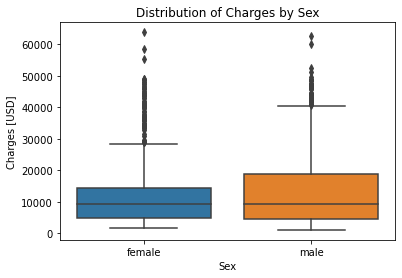

In [135]:
df = data_csv 

df_filt = df.filter(items=['sex', 'charges'])

sns.boxplot(data=df_filt, x="sex", y="charges").set(title="Distribution of Charges by Sex", xlabel="Sex", ylabel="Charges [USD]")

In [137]:
df_filt.groupby('sex')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


In [123]:
if male_avg_charges > female_avg_charges:
    print(f"Avg charges for male: USD {male_avg_charges:.2f} is greater than female: USD {female_avg_charges:.2f}")
elif male_avg_charges == female_avg_charges: 
    print((f"Avg charges for male: USD {male_avg_charges:.2f} is equal to female: USD {female_avg_charges:.2f}"))
else:
    print((f"Avg charges for male: USD {male_avg_charges:.2f} is less than female: USD {female_avg_charges:.2f}"))

Avg charges for male: USD 13956.75 is greater than female: USD 12569.58


### 3.2.2 Is proportion of individuals who are smokers greater than non-smokers?

In [125]:
df = data_csv

n = df['smoker'].count()

n_smokers = df.loc[df['smoker']=='yes', 'smoker'].count()

n_nonsmokers = df.loc[df['smoker']=='no', 'smoker'].count()


p_smokers = n_smokers / n 
percent_smokers = p_smokers * 100
p_nonsmokers = n_nonsmokers / n 
percent_nonsmokers = p_nonsmokers * 100

print(f"Proportion of sample - smokers: {percent_smokers:.2f}%, non-smokers: {percent_nonsmokers:.2f}%")

Proportion of sample - smokers: 20.48%, non-smokers: 79.52%


### 3.2.3 What is the probability of an individual is a female given that she is a smoker?

In [127]:
# P(F|S) = P(F intersection S) / P(S)

n_female_smokers = df.loc[((df['smoker'] == 'yes') & (df['sex'] == 'female')) , 'smoker'].count()

p_female_smokers = n_female_smokers / n_smokers

print(f"Probability of a person is a female given that she is a smoker is: {p_female_smokers:.2f}")

Probability of a person is a female given that she is a smoker is: 0.42


### 3.2.4 What is the probability of an individual is a male given that he is a smoker?

In [128]:
# P(M|S) = P(M intersection S) / P(S)
n_male_smokers = df.loc[((df['smoker'] == 'yes') & (df['sex'] == 'male')) , 'smoker'].count()

p_male_smokers = n_male_smokers / n_smokers

print(f"Probability of a person is a male given that he is a smoker is: {p_male_smokers:.2f}")

Probability of a person is a male given that he is a smoker is: 0.58


### 3.2.5 Distribution of Charges by Region

#### Distribution of Charges in All Region - Box Plot

[Text(0.5, 1.0, 'Distribution of Charges for Each Region'),
 Text(0.5, 0, 'US Region'),
 Text(0, 0.5, 'Charges [USD]')]

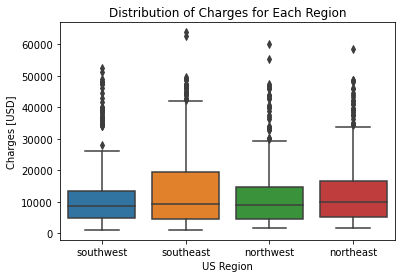

In [226]:
df = data_csv 

df_filt = df.filter(items=['region', 'charges'])

sns.boxplot(data=df_filt, x="region", y="charges").set(title="Distribution of Charges for Each Region", xlabel="US Region", ylabel="Charges [USD]")

In [227]:
df_filt.groupby('region')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.3641,58571.07448
northwest,325.0,12417.575374,11072.276928,1621.3402,4719.736550,8965.795750,14711.7438,60021.39897
southeast,364.0,14735.411438,13971.098589,1121.8739,4440.886200,9294.131950,19526.2869,63770.42801
southwest,325.0,12346.937377,11557.179101,1241.5650,4751.070000,8798.593000,13462.5200,52590.82939


#### Distribution of Charges in By Region (Northwest) - Histogram 

In [44]:
df = data_csv 

df_filt = df.filter(items=['region', 'charges'])

df_northwest = df_filt[df_filt['region'] == 'northwest']

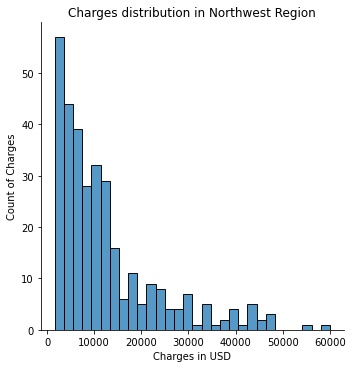

In [198]:
p = sns.displot(df_northwest, x="charges", bins=30)
p.set(title='Charges distribution in Northwest Region', xlabel="Charges in USD", ylabel="Count of Charges")

#### Distribution of Charges in By Region (Northeast) - Histogram 

In [203]:
df = data_csv 

df_filt = df.filter(items=['region', 'charges'])
df_northeast = df_filt[df_filt['region'] == 'northeast']

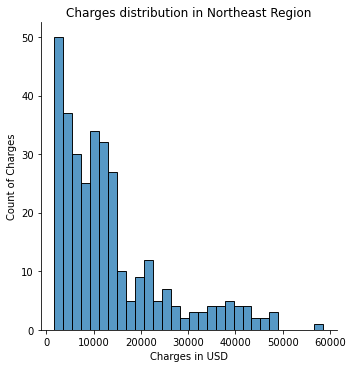

In [205]:
p = sns.displot(df_northeast, x="charges", bins=30)
p.set(title='Charges distribution in Northeast Region', xlabel="Charges in USD", ylabel="Count of Charges")

#### Distribution of Charges in By Region (Southeast) - Histogram 

In [206]:
df = data_csv 

df_filt = df.filter(items=['region', 'charges'])
df_southeast = df_filt[df_filt['region'] == 'southeast']

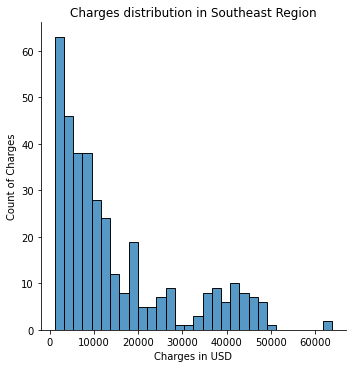

In [207]:
p = sns.displot(df_southeast, x="charges", bins=30)
p.set(title='Charges distribution in Southeast Region', xlabel="Charges in USD", ylabel="Count of Charges")

#### Distribution of Charges in By Region (Southwest) - Histogram 

In [208]:
df = data_csv 

df_filt = df.filter(items=['region', 'charges'])
df_southwest = df_filt[df_filt['region'] == 'southwest']

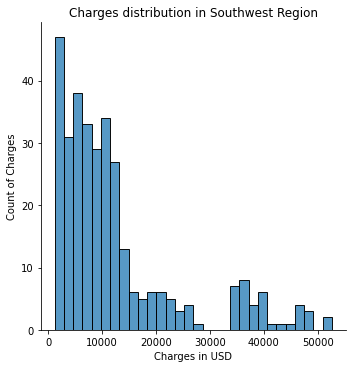

In [209]:
p = sns.displot(df_southwest, x="charges", bins=30)
p.set(title='Charges distribution in Southwest Region', xlabel="Charges in USD", ylabel="Count of Charges")

### 3.3 Continuous Variable Analysis

#### 3.3.1 Distribution of BMI and Charges

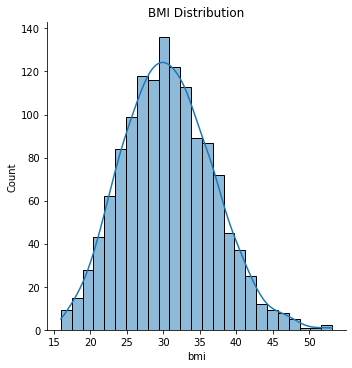

In [130]:
df = data_csv

p = sns.displot(df, x="bmi", kde=True).set(title="BMI Distribution")

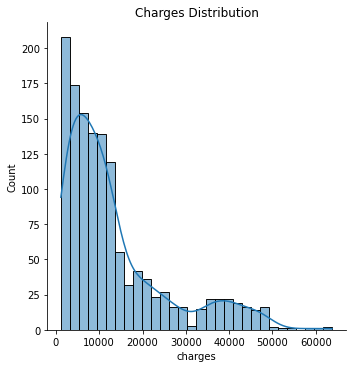

In [236]:
df = data_csv

p = sns.displot(df, x="charges", kde=True).set(title="Charges Distribution")

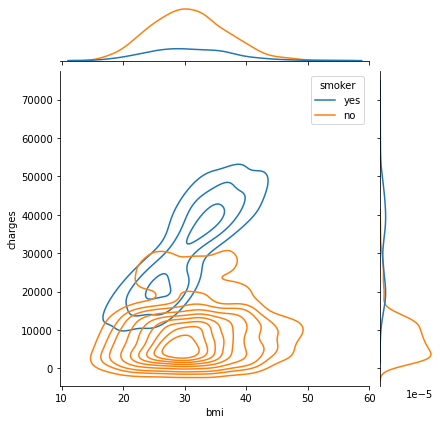

In [237]:
df = data_csv
sns.jointplot(
    data=df,
    x="bmi", y="charges", kind="kde", hue="smoker")

### 3.3.2 Which is more likely to occur? 

#### (a) An individual with BMI > 25 getting charges over 16.7k?  
#### (b) An individual with BMI < 25 getting charges over 16.7k?

In [203]:
df = data_csv

n = df['charges'].count()

# Filtering data for individuals with charges > 16.7 
n_chargesgt = df.loc[df['charges']>16700, 'charges'].count()

# Filtering data for individuals with BMI > 25 
n_bmigt25 = df.loc[df['bmi']>25, 'bmi'].count()

# Filtering data for individuals with BMI < 25 
n_bmilt25 = df.loc[df['bmi']<25, 'bmi'].count()

# Filtering data for individuals with BMI > 25 and charges > 16700
n_chargesgt_bmigt = df.loc[((df['charges'] > 16700) & (df['bmi']>25)) , 'bmi'].count()

# Filtering data for individuals with BMI < 25 and charges < 16700
n_chargeslt_bmilt = df.loc[((df['charges'] > 16700) & (df['bmi']<25)) , 'bmi'].count()

# Probability of a person with charges > 16700 
p_chargesgt = n_chargesgt / n

# Conditional probability for an individual with BMI > 25 getting charges over 16.7k
p_cgt16700_bmigt25 = n_chargesgt_bmigt / n_bmigt25

# Conditional probability for an individual with BMI < 25 getting charges over 16.7k
p_clt16700_bmilt25 = n_chargeslt_bmilt / n_bmilt25

print(f"Probability of a person with charges > 16.7k: {p_chargesgt:.2f}")
print(f"Probability of a person with BMI > 25 and charges > USD16.7k: {p_cgt16700_bmigt25:.2f}")
print(f"Probability of a person with BMI < 25 and charges > USD16.7k: {p_clt16700_bmilt25:.2f}")

Probability of a person with charges > 16.7k: 0.25
Probability of a person with BMI > 25 and charges > USD16.7k: 0.26
Probability of a person with BMI < 25 and charges > USD16.7k: 0.21


### 3.3.3 Which is more likely to occur? 

#### (a) An individual who smokes with BMI > 25 getting charges over 16.7k?  
#### (b) An individual who does not smoke with BMI > 25 getting charges over 16.7k?

In [205]:
df = data_csv

n = df['charges'].count()

# Filtering data for individuals with charges > 16.7 
n_chargesgt = df.loc[df['charges']>16700, 'charges'].count()

# Filtering data for individuals with BMI > 25 and is a smoker
n_bmigt25_s = df.loc[((df['smoker'] == 'yes') & (df['bmi']>25)) , 'bmi'].count()

# Filtering data for individuals with BMI > 25 and is not a smoker
n_bmilt25_ns = df.loc[((df['smoker'] == 'no') & (df['bmi']>25)) , 'bmi'].count()

# Filtering data for individuals who smokes with BMI > 25 and charges over 16700 
n_chargesgt_bmigt_s = df.loc[((df['charges'] > 16700) & (df['bmi']>25) & (df['smoker']=='yes')) , 'bmi'].count()

# Filtering data for individuals who do not smoke with BMI > 25 and charges over 16700 
n_chargeslt_bmilt_ns = df.loc[((df['charges'] > 16700) & (df['bmi']>25) & (df['smoker']=='no')) , 'bmi'].count()

# Probability of a person with charges > 16700 
p_chargesgt = n_chargesgt / n

# Conditional probability for an individual who smokes with BMI > 25 getting charges over 16.7k
p_cgt16700_bmigt25_s = n_chargesgt_bmigt_s / n_bmigt25_s

# Conditional probability for an individual who doesn't smoke with BMI > 25 getting charges over 16.7k
p_clt16700_bmilt25_ns = n_chargeslt_bmilt_ns / n_bmilt25_ns

print(f"Probability of a person with charges > 16.7k: {p_chargesgt:.2f}")
print(f"Probability of a person who smokes with BMI > 25 and charges > USD16.7k: {p_cgt16700_bmigt25_s:.2f}")
print(f"Probability of a person who does not smoke with BMI > 25 and charges > USD16.7k: {p_clt16700_bmilt25_ns:.2f}")

Probability of a person with charges > 16.7k: 0.25
Probability of a person who smokes with BMI > 25 and charges > USD16.7k: 0.98
Probability of a person who does not smoke with BMI > 25 and charges > USD16.7k: 0.08


### 3.3.4 Which is more likely to occur? 

#### (a) An female individual with BMI > 25 getting charges over 16.7k?  
#### (b) An male individual with BMI > 25 getting charges over 16.7k?

In [206]:
df = data_csv

n = df['charges'].count()

# Filtering data for individuals with charges > 16.7 
n_chargesgt = df.loc[df['charges']>16700, 'charges'].count()

# Filtering data for individuals with BMI > 25 and is a female
n_bmigt25_f = df.loc[((df['sex'] == 'female') & (df['bmi']>25)) , 'bmi'].count()

# Filtering data for individuals with BMI > 25 and is not a male
n_bmigt25_m = df.loc[((df['sex'] == 'male') & (df['bmi']>25)) , 'bmi'].count()

# Filtering data for male individuals with BMI > 25 and charges > 16700
n_chargesgt_male = df.loc[((df['sex'] == 'male') & (df['bmi']>25)) & (df['charges']>16700), 'bmi'].count()

# Filtering data for female individuals with BMI > 25 and charges < 16700
n_chargesgt_female = df.loc[((df['sex'] == 'female') & (df['bmi']>25) & (df['charges']>16700)) , 'bmi'].count()


# Probability of a person with charges > 16700 
p_chargesgt = n_chargesgt / n


# Conditional probability for a male individual with BMI > 25 getting charges over 16.7k
p_cgt16700_male = n_chargesgt_male / n_bmigt25_m

# Conditional probability for a female individual with BMI > 25 getting charges over 16.7k
p_clt16700_female = n_chargesgt_female / n_bmigt25_f

print(f"Probability of a person with charges > 16.7k: {p_chargesgt:.2f}")
print(f"Probability of a female with BMI > 25 and charges > USD16.7k: {p_clt16700_female:.2f}")
print(f"Probability of a male with BMI > 25 and charges > USD16.7k: {p_cgt16700_male:.2f}")

Probability of a person with charges > 16.7k: 0.25
Probability of a female with BMI > 25 and charges > USD16.7k: 0.22
Probability of a male with BMI > 25 and charges > USD16.7k: 0.29


### 3.3.5 Which is more likely to occur? 

#### (a) An female individual who smokes with BMI > 25 getting charges over 16.7k?  
#### (b) An male individual who smokes with BMI > 25 getting charges over 16.7k?

In [231]:
df = data_csv

n = df['charges'].count()

# Filtering data for individuals with charges > 16.7 
n_chargesgt = df.loc[df['charges']>16700, 'charges'].count()

# Filtering data for female smoker with BMI > 25 
n_bmigt25_fs = df.loc[((df['sex'] == 'female') & (df['bmi']>25) & (df['smoker']=='yes')) , 'bmi'].count()

# Filtering data for male smoker with BMI > 25 
n_bmigt25_ms = df.loc[((df['sex'] == 'male') & (df['bmi']>25) & (df['smoker']=='yes')) , 'bmi'].count()

# Filtering data for male smoker with BMI > 25 and charges > 16700
n_chargesgt_male = df.loc[((df['sex'] == 'male') & (df['bmi']>25) & (df['charges']>16700) & (df['smoker']=='yes')), 'bmi'].count()

# Filtering data for female smoker with BMI > 25 and charges < 16700
n_chargesgt_female = df.loc[((df['sex'] == 'female') & (df['bmi']>25) & (df['charges']>16700) & (df['smoker']=='yes')) , 'bmi'].count()

# Probability of a person with charges > 16700 
p_chargesgt = n_chargesgt / n

# Conditional probability for a male individual with BMI > 25 getting charges over 16.7k
p_cgt16700_male = n_chargesgt_male / n_bmigt25_ms

# Conditional probability for a female individual with BMI > 25 getting charges over 16.7k
p_clt16700_female = n_chargesgt_female / n_bmigt25_fs

print(f"Probability of a person with charges > 16.7k: {p_chargesgt:.2f}")
print(f"Probability of a female smoker with BMI > 25 and charges > USD16.7k: {p_clt16700_female:.2f}")
print(f"Probability of a male smoker with BMI > 25 and charges > USD16.7k: {p_cgt16700_male:.2f}")

Probability of a person with charges > 16.7k: 0.25
Probability of a female smoker with BMI > 25 and charges > USD16.7k: 1.00
Probability of a male smoker with BMI > 25 and charges > USD16.7k: 0.97


### 3.4 Correlation between Variable

#### 3.4.1 Correlation Between BMI, Age, Children and Charges

In [163]:
df = data_csv
df.corr(method ='pearson')


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


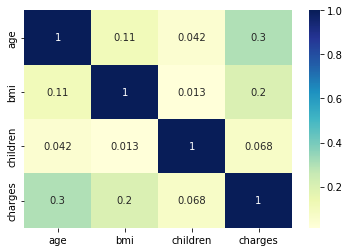

In [164]:
df = data_csv
df.corr(method ='pearson')

# plotting correlation heatmap
p = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

#### 3.4.2 Correlation Between Smoking Status and Charges

[Text(0.5, 1.0, 'Charges by Smoking Status'),
 Text(0.5, 0, 'BMI'),
 Text(0, 0.5, 'Charges')]

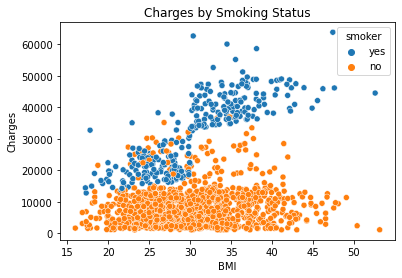

In [195]:
df = data_csv
df_filt = df.filter(items=['bmi', 'charges', 'smoker'])
p = sns.scatterplot(data=df_filt, x="bmi", y="charges", hue="smoker")

p.set(title="Charges by Smoking Status", xlabel="BMI", ylabel="Charges")

In [196]:
df_filt.corr(method="pearson")

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


#### 3.4.2.1 Correlation Between Smokers and Charges 

Text(0.5, 1.0, 'Smoker vs Charges')

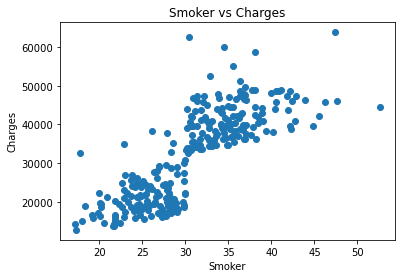

In [191]:
df = data_csv 

df_filt = df.filter(items=['bmi', 'charges', 'smoker'])

df_smoker = df_filt[df_filt['smoker'] == 'yes']

plt.scatter(df_smoker['bmi'], df_smoker['charges'])
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs Charges')

In [199]:
df_smoker.corr()

,bmi,charges
bmi,1.000000,0.806481
charges,0.806481,1.000000


#### 3.4.2.2 Correlation Between Non-smokers and Charges 

Text(0.5, 1.0, 'Non Smoker vs Charges')

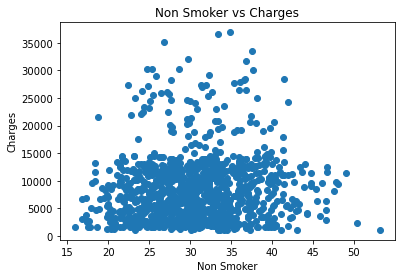

In [192]:
df = data_csv 

df_filt = df.filter(items=['bmi', 'charges', 'smoker'])

df_nonsmoker = df_filt[df_filt['smoker'] == 'no']

plt.scatter(df_nonsmoker['bmi'], df_nonsmoker['charges'])
plt.xlabel('Non Smoker')
plt.ylabel('Charges')
plt.title('Non Smoker vs Charges')

In [198]:
df_nonsmoker.corr()

,bmi,charges
bmi,1.000000,0.084037
charges,0.084037,1.000000


#### 3.4.3 Correlation Between Charges and Sex

[Text(0.5, 1.0, 'Charges by Sex Status'),
 Text(0.5, 0, 'BMI'),
 Text(0, 0.5, 'Charges')]

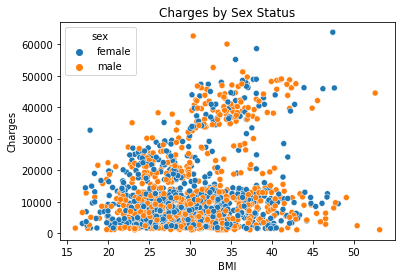

In [201]:
df = data_csv
df_filt = df.filter(items=['bmi', 'charges', 'sex'])
p = sns.scatterplot(data=df_filt, x="bmi", y="charges", hue="sex")

p.set(title="Charges by Sex Status", xlabel="BMI", ylabel="Charges")

In [200]:
df_filt.corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


#### 3.4.3.1 Correlation Between Charges and Male 

Text(0.5, 1.0, 'Male BMI vs Charges')

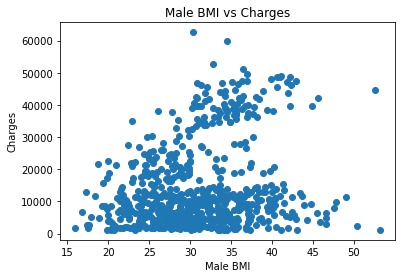

In [168]:
# Correlation between Gender with Charges 
df = data_csv 

df_filt = df.filter(items=['bmi', 'charges', 'sex'])

df_smoker = df_filt[df_filt['sex'] == 'male']

plt.scatter(df_smoker['bmi'], df_smoker['charges'])
plt.xlabel('Male BMI')
plt.ylabel('Charges')
plt.title('Male BMI vs Charges')

In [170]:
df_smoker[['bmi', 'charges']].corr(method ='pearson')

,bmi,charges
bmi,1.000000,0.225847
charges,0.225847,1.000000


#### 3.4.3.1 Correlation Between Charges and Male 

Text(0.5, 1.0, 'Female BMI vs Charges')

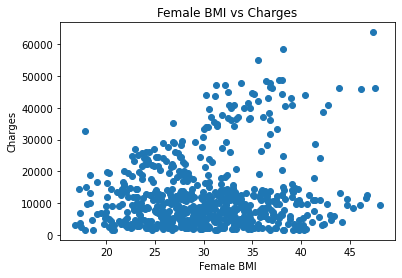

In [233]:
# Correlation between Gender with Charges 
df = data_csv 

df_filt = df.filter(items=['bmi', 'charges', 'sex'])

df_smoker = df_filt[df_filt['sex'] == 'female']

plt.scatter(df_smoker['bmi'], df_smoker['charges'])
plt.xlabel('Female BMI')
plt.ylabel('Charges')
plt.title('Female BMI vs Charges')

In [234]:
df_smoker[['bmi', 'charges']].corr(method ='pearson')

,bmi,charges
bmi,1.000000,0.161419
charges,0.161419,1.000000


#### 3.4.3.3 Correlation Between Charges and Male Smokers

Text(0.5, 1.0, 'Male Smoker vs Charges')

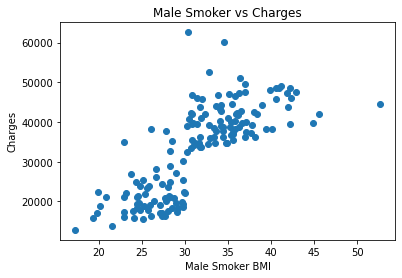

In [279]:
# Gender who smokes 

# Correlation between Gender with Charges 
df = data_csv 

df_filt = df.filter(items=['bmi', 'charges', 'sex', 'smoker'])

df_malesmoker = df_filt[(df_filt['smoker'] == 'yes') & (df_filt['sex'] == 'male')]

plt.scatter(df_malesmoker['bmi'], df_malesmoker['charges'])
plt.xlabel('Male Smoker BMI')
plt.ylabel('Charges')
plt.title('Male Smoker vs Charges')

In [280]:
np.cov(df_malesmoker['bmi'], df_malesmoker['charges'])

array([[3.54266376e+01, 5.12995461e+04],
       [5.12995461e+04, 1.25499834e+08]])

In [281]:
df_malesmoker[['bmi', 'charges']].corr(method ='pearson')

,bmi,charges
bmi,1.000000,0.769355
charges,0.769355,1.000000


#### 3.4.3.4 Correlation Between Charges and Female Smokers

Text(0.5, 1.0, 'Female Smoker vs Charges')

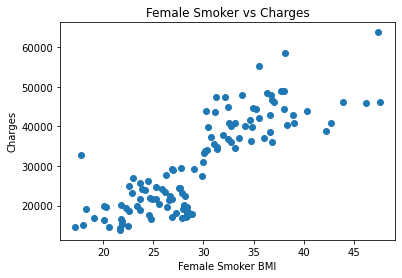

In [173]:
df = data_csv 

df_filt = df.filter(items=['bmi', 'charges', 'sex', 'smoker'])

df_femalesmoker = df_filt[(df_filt['smoker'] == 'yes') & (df_filt['sex'] == 'female')]

plt.scatter(df_femalesmoker['bmi'], df_femalesmoker['charges'])
plt.xlabel('Female Smoker BMI')
plt.ylabel('Charges')
plt.title('Female Smoker vs Charges')

In [174]:
np.cov(df_femalesmoker['bmi'], df_femalesmoker['charges'])

array([[4.44062513e+01, 6.71224880e+04],
       [6.71224880e+04, 1.41789423e+08]])

In [175]:
df_femalesmoker[['bmi', 'charges']].corr(method ='pearson')

,bmi,charges
bmi,1.00000,0.84591
charges,0.84591,1.00000


#### 3.4.5 Correlation Between Region and Charges

[Text(0.5, 1.0, 'BMI vs Charges by Region'),
 Text(0.5, 0, 'BMI'),
 Text(0, 0.5, 'Charges')]

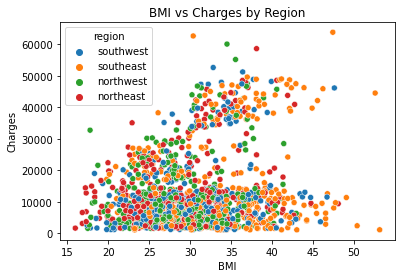

In [181]:
df = data_csv
df_filt = df.filter(items=['bmi', 'charges', 'region'])
p = sns.scatterplot(data=df_filt, x="bmi", y="charges", hue="region")

p.set(title="BMI vs Charges by Region", xlabel="BMI", ylabel="Charges")

In [182]:
df_filt.corr(method="pearson")

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


#### 3.4.5.1 Correlation Between Southwest Region and Charges 

Text(0.5, 1.0, 'Southwest Region vs Charges')

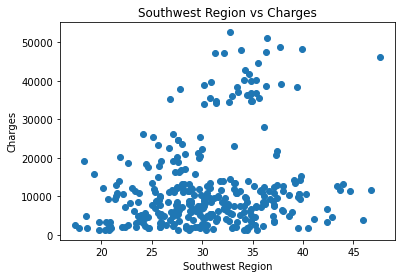

In [178]:
df = data_csv 

df_filt = df.filter(items=['bmi', 'charges', 'region'])

df_southwest = df_filt[df_filt['region'] == 'southwest']

plt.scatter(df_southwest['bmi'], df_southwest['charges'])
plt.xlabel('Southwest Region')
plt.ylabel('Charges')
plt.title('Southwest Region vs Charges')

In [179]:
df_southwest[['bmi', 'charges']].corr(method ='pearson')

,bmi,charges
bmi,1.000000,0.222928
charges,0.222928,1.000000


#### 3.4.5.2 Correlation Between Southeast Region and Charges 

Text(0.5, 1.0, 'Southeast Region vs Charges')

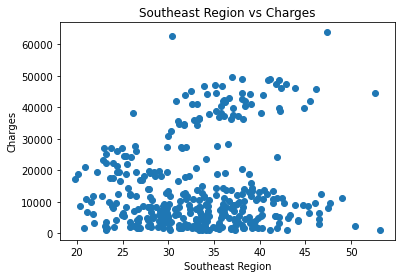

In [183]:
df = data_csv 

df_filt = df.filter(items=['bmi', 'charges', 'region'])

df_southeast = df_filt[df_filt['region'] == 'southeast']

plt.scatter(df_southeast['bmi'], df_southeast['charges'])
plt.xlabel('Southeast Region')
plt.ylabel('Charges')
plt.title('Southeast Region vs Charges')

In [185]:
df_southeast[['bmi', 'charges']].corr(method ='pearson')

,bmi,charges
bmi,1.000000,0.142994
charges,0.142994,1.000000


#### 3.4.5.3 Correlation Between Northeast Region and Charges 

Text(0.5, 1.0, 'Northeast Region vs Charges')

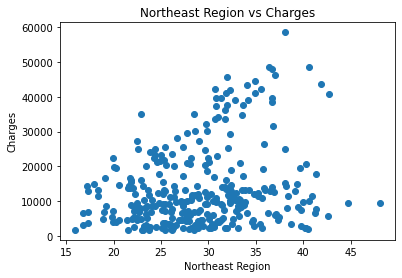

In [186]:
df = data_csv 

df_filt = df.filter(items=['bmi', 'charges', 'region'])

df_northeast = df_filt[df_filt['region'] == 'northeast']

plt.scatter(df_northeast['bmi'], df_northeast['charges'])
plt.xlabel('Northeast Region')
plt.ylabel('Charges')
plt.title('Northeast Region vs Charges')

In [187]:
df_northeast[['bmi', 'charges']].corr(method ='pearson')

,bmi,charges
bmi,1.000000,0.231712
charges,0.231712,1.000000


#### 3.4.5.4 Correlation Between Northwest Region and Charges 

Text(0.5, 1.0, 'Northwest Region vs Charges')

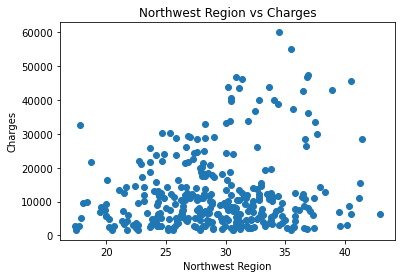

In [188]:
df = data_csv 

df_filt = df.filter(items=['bmi', 'charges', 'region'])

df_northwest = df_filt[df_filt['region'] == 'northwest']

plt.scatter(df_northwest['bmi'], df_northwest['charges'])
plt.xlabel('Northwest Region')
plt.ylabel('Charges')
plt.title('Northwest Region vs Charges')

In [189]:
df_northwest[['bmi', 'charges']].corr(method ='pearson')

,bmi,charges
bmi,1.000000,0.181073
charges,0.181073,1.000000


### 3.5 Hypothesis Testing 

### 3.5.1 Is the mean charges for smoker greater than non smoker? 

#### Exploring data and sampling

In [9]:
# Smoker vs non smoker data statistical summary 

df = data_csv 

df.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


In [88]:
# Hypothesis testing by using sample size of n = 50 

df = data_csv 

df_filt = df.filter(items=['bmi', 'charges', 'smoker'])


df_nonsmoker = df_filt[df_filt['smoker'] == 'no']['charges'] 
df_smoker = df_filt[df_filt['smoker'] == 'yes']['charges'] 


# 50 smokers and non smokers are randomly sampled 

df_n50_nonsmoker = df_nonsmoker.sample(50)
df_n50_smoker = df_smoker.sample(50)

In [89]:
# Statistics summary for smoker sample 

df_n50_nonsmoker.describe()

count       50.000000
mean      8080.644350
std       4644.357211
min       1242.816000
25%       4090.893362
50%       7543.910700
75%      11132.659542
max      21595.382290
Name: charges, dtype: float64

In [90]:
# Statistics summary for non-smoker sample 

df_n50_smoker.describe()

count       50.000000
mean     34511.782081
std      10659.549741
min      15817.985700
25%      24557.052750
50%      35636.051090
75%      42255.828013
max      60021.398970
Name: charges, dtype: float64

#### Hypothesis Testing

In [221]:
# Let df_n50_smoker be mean 1, and df_n50_nonsmoker be mean 2 
# Hypothesis testing using upper tailed t-test with sample size of 50 
# H0 => mean1 = mean2 
# H1 => mean1 > mean2
# alpha = 0.05, reject H0 if p < 0.05 
# variance 1 != variance 2 

from scipy.stats import ttest_ind

alpha = 0.05 

stat, p = ttest_ind(a = df_n50_smoker, b = df_n50_nonsmoker, equal_var=False, alternative='greater')

print(f"Statistics = {stat}, p-value = {p}") 

Statistics = 16.073810762501978, p-value = 5.638954872549742e-25


#### Conclusion

In [222]:
# Decision Making 
if p > alpha:
    print('Two group means are equal (Not enough evidence to reject H0)') 
else:
    print('Two group means are different (Sufficient evidence to reject H0)')

Two group means are different (Sufficient evidence to reject H0)


### 3.5.2 Is the mean charges of individuals with BMI > 25 higher than BMI < 25? 

#### Exploring data and sampling

In [22]:
df = data_csv 


df.loc[(df["bmi"] > 25), "bmi-range"] = "greater than 25"
df.loc[(df["bmi"] < 25), "bmi-range"] = "less than 25"
       
df.groupby('bmi-range')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
bmi-range,,,,,,,,
greater than 25,1091.0,13946.476035,12834.725537,1131.5066,4889.51815,9563.0290,17654.442975,63770.42801
less than 25,245.0,10282.224474,7520.485850,1121.8739,3861.20965,8582.3023,14571.890800,35069.37452


In [93]:
# Hypothesis testing by using sample size of n = 50 

df = data_csv 

df_filt = df.filter(items=['bmi', 'charges']) 

# Note: bmigt25: BMI greater than 25, bmilt25: BMI less than 25

df_bmigt25 = df_filt[df_filt['bmi'] > 25]['charges'] 
df_bmilt25 = df_filt[df_filt['bmi'] < 25]['charges']


# 50 smokers and non smokers are randomly sampled 

df_n50_bmigt25 = df_bmigt25.sample(50)
df_n50_bmilt25 = df_bmilt25.sample(50)

In [56]:
df_n50_bmigt25.describe()

count       50.000000
mean     16468.804985
std      14898.858419
min       1532.469700
25%       5509.014500
50%      10424.953650
75%      24441.652755
max      62592.873090
Name: charges, dtype: float64

In [57]:
df_n50_bmilt25.describe()

count       50.000000
mean     10207.577637
std       7762.766287
min       1121.873900
25%       3413.645437
50%       8752.733375
75%      15710.590000
max      32734.186300
Name: charges, dtype: float64

#### Hypothesis Testing

In [68]:
# Let df_n50_bmigt25 be mean 1, and df_n50_bmilt25 be mean 2 
# Hypothesis testing using upper tailed t-test with sample size of 50 
# H0 => mean1 = mean2 
# H1 => mean1 > mean2
# alpha = 0.05, reject H0 if p < 0.05 
# variance 1 != variance 2 

from scipy.stats import ttest_ind

alpha = 0.05 

stat, p = ttest_ind(a = df_n50_bmigt25, b = df_n50_bmilt25, equal_var=False, alternative='greater')

print(f"Statistics = {stat}, p-value = {p}") 

Statistics = 2.6353473754867416, p-value = 0.00511946214739432


#### Decision Making 

In [69]:
if p > alpha:
    print('Two group means are equal (Not enough evidence to reject H0)') 
else:
    print('Two group means are different (Sufficient evidence to reject H0)')

Two group means are different (Sufficient evidence to reject H0)


### 3.5.3 Is the mean charges of male greater than female? 

#### Exploring data and sampling

In [70]:
df = data_csv 

df.groupby('sex')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


In [83]:
# Hypothesis testing by using sample size of n = 50 

df = data_csv 

df_filt = df.filter(items=['bmi', 'charges', 'sex'])

df_female = df_filt[df_filt['sex'] == 'female']['charges'] 
df_male = df_filt[df_filt['sex'] == 'male']['charges'] 

df_n50_female = df_female.sample(50)
df_n50_male = df_male.sample(50)

In [84]:
df_n50_female.describe()

count       50.000000
mean     12492.664694
std      10169.831501
min       1633.044400
25%       5489.757962
50%       9759.966450
75%      14417.337938
max      44423.803000
Name: charges, dtype: float64

In [85]:
df_n50_male.describe()

count       50.000000
mean     13417.043383
std      13270.373423
min       1121.873900
25%       4554.380063
50%       8823.785550
75%      17201.854575
max      48673.558800
Name: charges, dtype: float64

#### Hypothesis Testing

In [86]:
from scipy.stats import ttest_ind

alpha = 0.05 

stat, p = ttest_ind(a = df_n50_male, b = df_n50_female, equal_var=False, alternative='greater')

print(f"Statistics = {stat}, p-value = {p}") 

Statistics = 0.3909507474927867, p-value = 0.34836977890781506


#### Decision Making

In [87]:
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Not enough evidence to reject H0)') 
else:
    print('Two group means are different (Sufficient evidence to reject H0)')

Two group means are equal (Not enough evidence to reject H0)


### 3.6 Regression

In [44]:
import pandas as pd 
import math as math
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ttest_ind
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
# 1. Import insurance dataset 
data_csv = pd.read_csv('/Users/jkurniawan/Documents/Pacmann/Probability/Dataset/insurance.csv') 

In [30]:
df = data_csv

In [31]:
# 2. Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [32]:
# 3. Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

#### 3.6.1 Linear Regression

In [37]:
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, train_size=0.8, test_size=0.2, random_state=15)
Lin_reg = LinearRegression(fit_intercept=True)
Lin_reg.fit(x_train, y_train)
y_pred = Lin_reg.predict(x_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-12148.873762299518
[  262.46750157    39.10830766   332.83680592   611.41232579
 23842.62495538  -356.48064676]
0.7708744759820262


In [46]:
##Evaluating the performance of the algorithm
print('The accuracy on the training data:',Lin_reg.score(x_train, y_train).round(3))
print('The accuracy on the testing data:',Lin_reg.score(x_test, y_test).round(3))
print(' ')
print('Root Mean Squared Error (RMSE)')
print('The RMSE on the training dataset:', round(math.sqrt(mean_squared_error(y_train, y_pred)),3))
print('The RMSE on the testing dataset:', round(math.sqrt(mean_squared_error(y_test, Lin_reg.predict(x_test))),3))
print(' ')
print('Mean Absolute Error (MAE)')
print('The MAE on the training dataset:', mean_absolute_error(y_train, y_pred).round(3))
print('The MAE on the testing dataset:', mean_absolute_error(y_test, Lin_reg.predict(x_test)).round(3))

The accuracy on the training data: 0.745
The accuracy on the testing data: 0.771
 
Root Mean Squared Error (RMSE)
The RMSE on the training dataset: 6185.346
The RMSE on the testing dataset: 5465.54
 
Mean Absolute Error (MAE)
The MAE on the training dataset: 4274.754
The MAE on the testing dataset: 3936.651


/var/folders/sc/2pzdw16s78b0gqx1m86y8w200000gn/T/ipykernel_40812/2276134332.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()],


Text(0.5, 1.0, 'Actual vs Predicted Values')

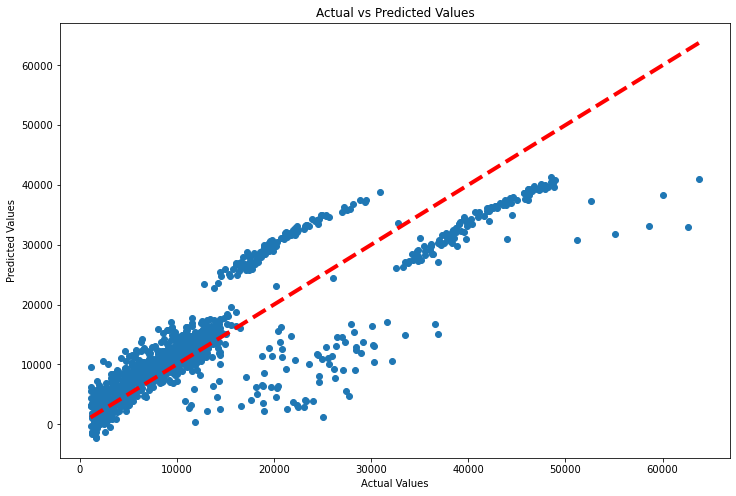

In [48]:
plt.figure(figsize = (12,8))
plt.scatter(y_train, y_pred);

plt.plot([y_train.min(), y_train.max()], 
         [y_train.min(), y_train.max()], 
         'k--', 
         c = 'red',
         lw = 4);

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

#### 3.6.2 Polynomial Regression

In [51]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5325.8817052529575
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345236


In [58]:
##Evaluating the performance of the algorithm
print('The accuracy on the training data:',Pol_reg.score(x_train, y_train).round(3))
print('The accuracy on the testing data:',Pol_reg.score(x_test, y_test).round(3))
print(' ')

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

The accuracy on the training data: 0.832
The accuracy on the testing data: 0.881
 
Mean Absolute Error: 2824.4950454776417
Mean Squared Error: 18895160.098780274
Root Mean Squared Error: 4346.8563466924315


In [53]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268


/var/folders/sc/2pzdw16s78b0gqx1m86y8w200000gn/T/ipykernel_40812/1281901028.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()],


Text(0.5, 1.0, 'Actual vs Predicted Values')

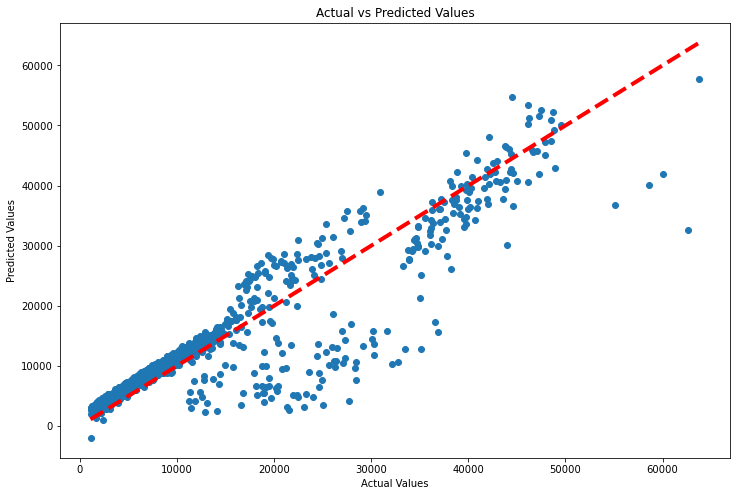

In [57]:
plt.figure(figsize = (12,8))
plt.scatter(y_train, y_train_pred);

plt.plot([y_train.min(), y_train.max()], 
         [y_train.min(), y_train.max()], 
         'k--', 
         c = 'red',
         lw = 4);

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

#### Conclusion

#### Polynomial Regression has a better accuracy than linear regression model. 